In [2]:
# from imblearn.over_sampling import SMOTE
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("./data/credit_card_default.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
try:
    assert sns.__version__ != "0.13.2" 
    raise ValueError("유효하지 않은 입력 값입니다. 양수를 입력해야 합니다.")
except Exception as e :
    print(f"{e} sns 버전 확인 필요")
    

 sns 버전 확인 필요


In [5]:
import warnings
warnings.filterwarnings('ignore')

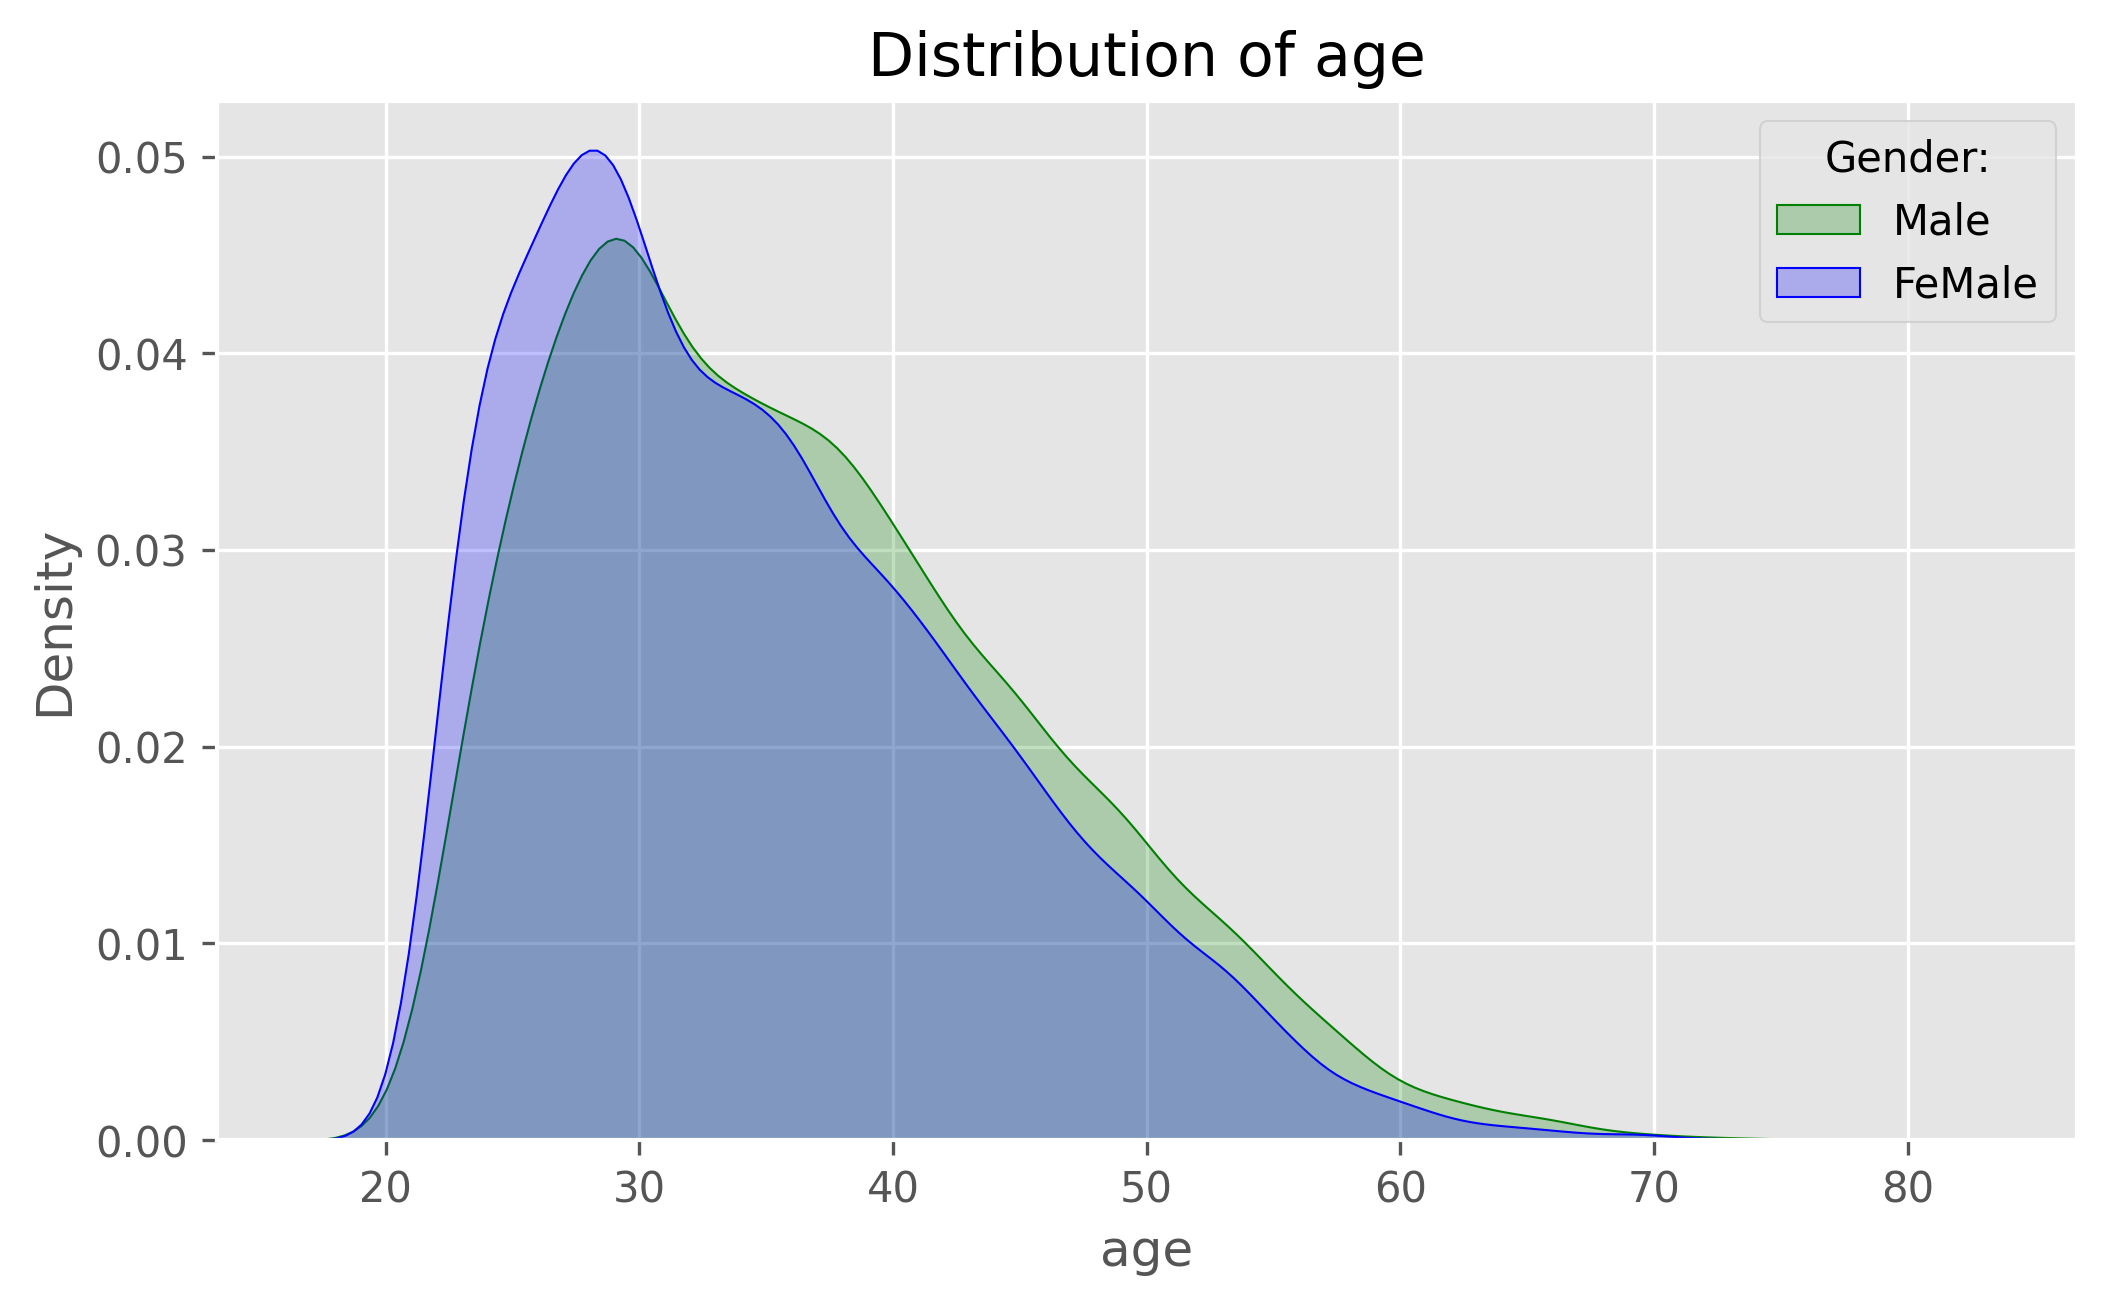

In [6]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(), hist=False, color='green', kde_kws={'shade' : True}, label='Male')
sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(), hist=False, color='blue', kde_kws={'shade' : True},label='FeMale')
ax.set_title("Distribution of age")
ax.legend(title="Gender:")

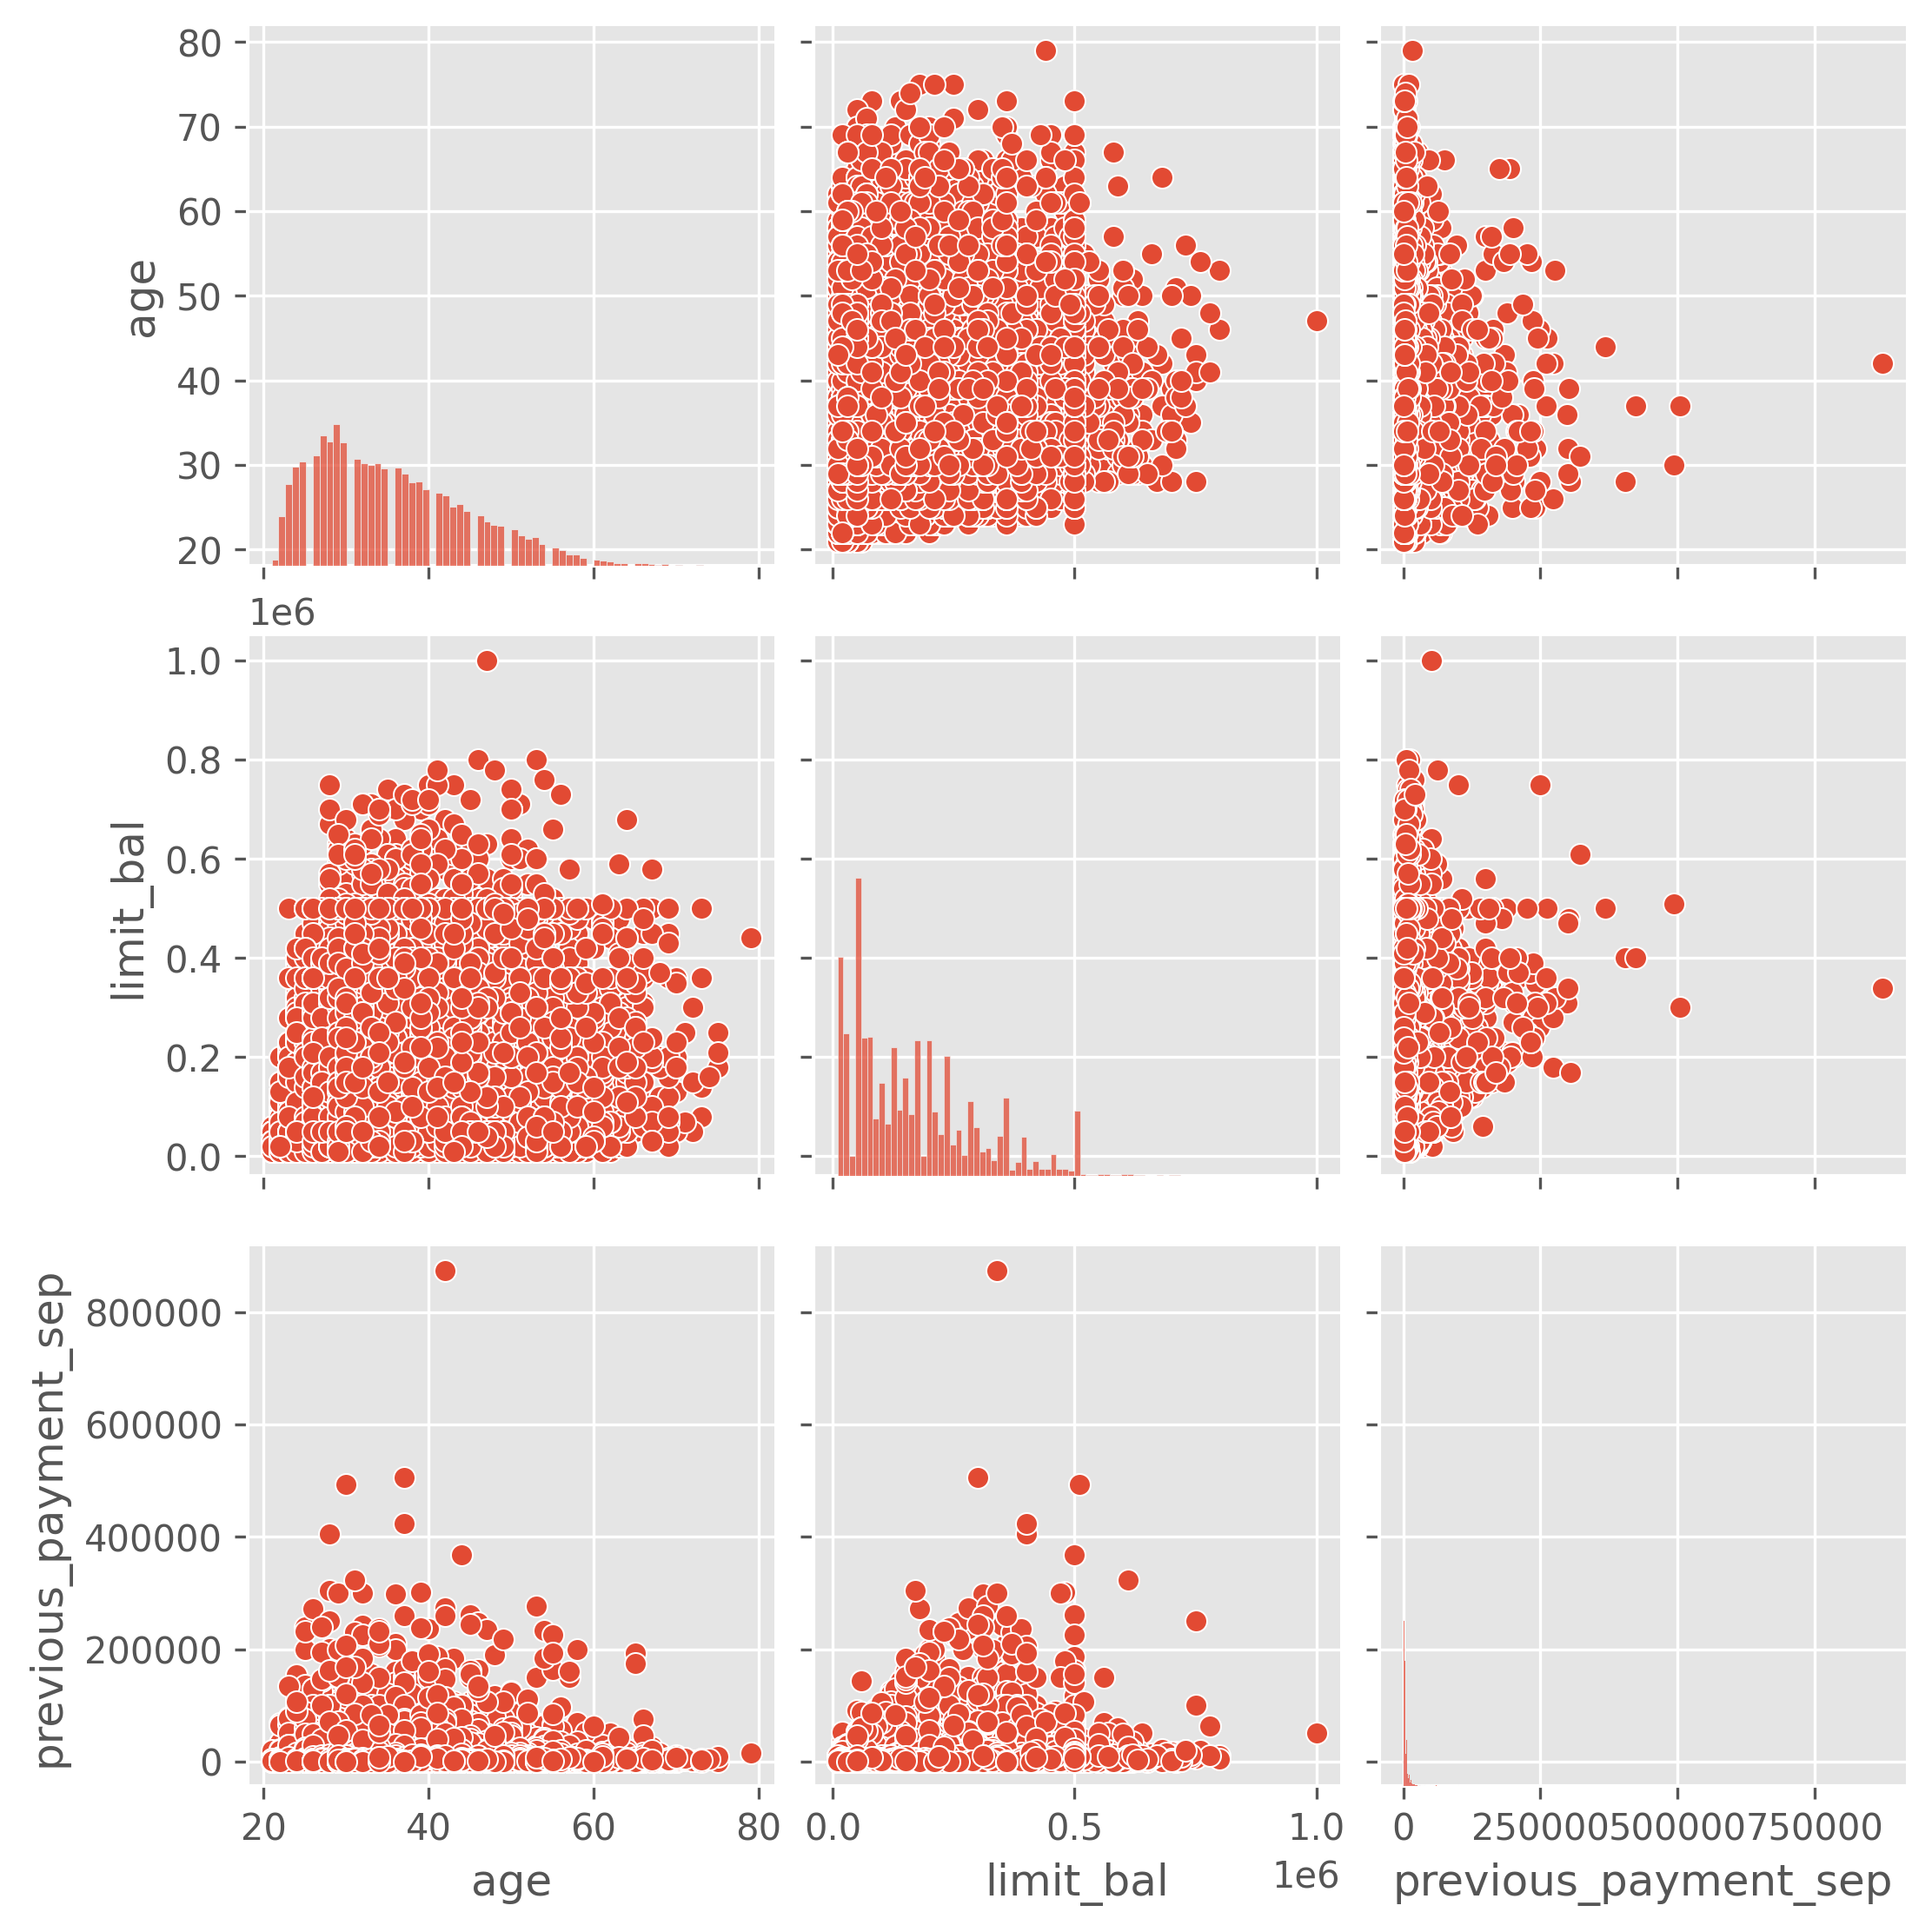

In [7]:
sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])

In [8]:
corr_matrix = df.select_dtypes(include='number').corr()


In [10]:
import numpy as np
mask = np.zeros_like(corr_matrix, dtype=bool)

<Axes: >

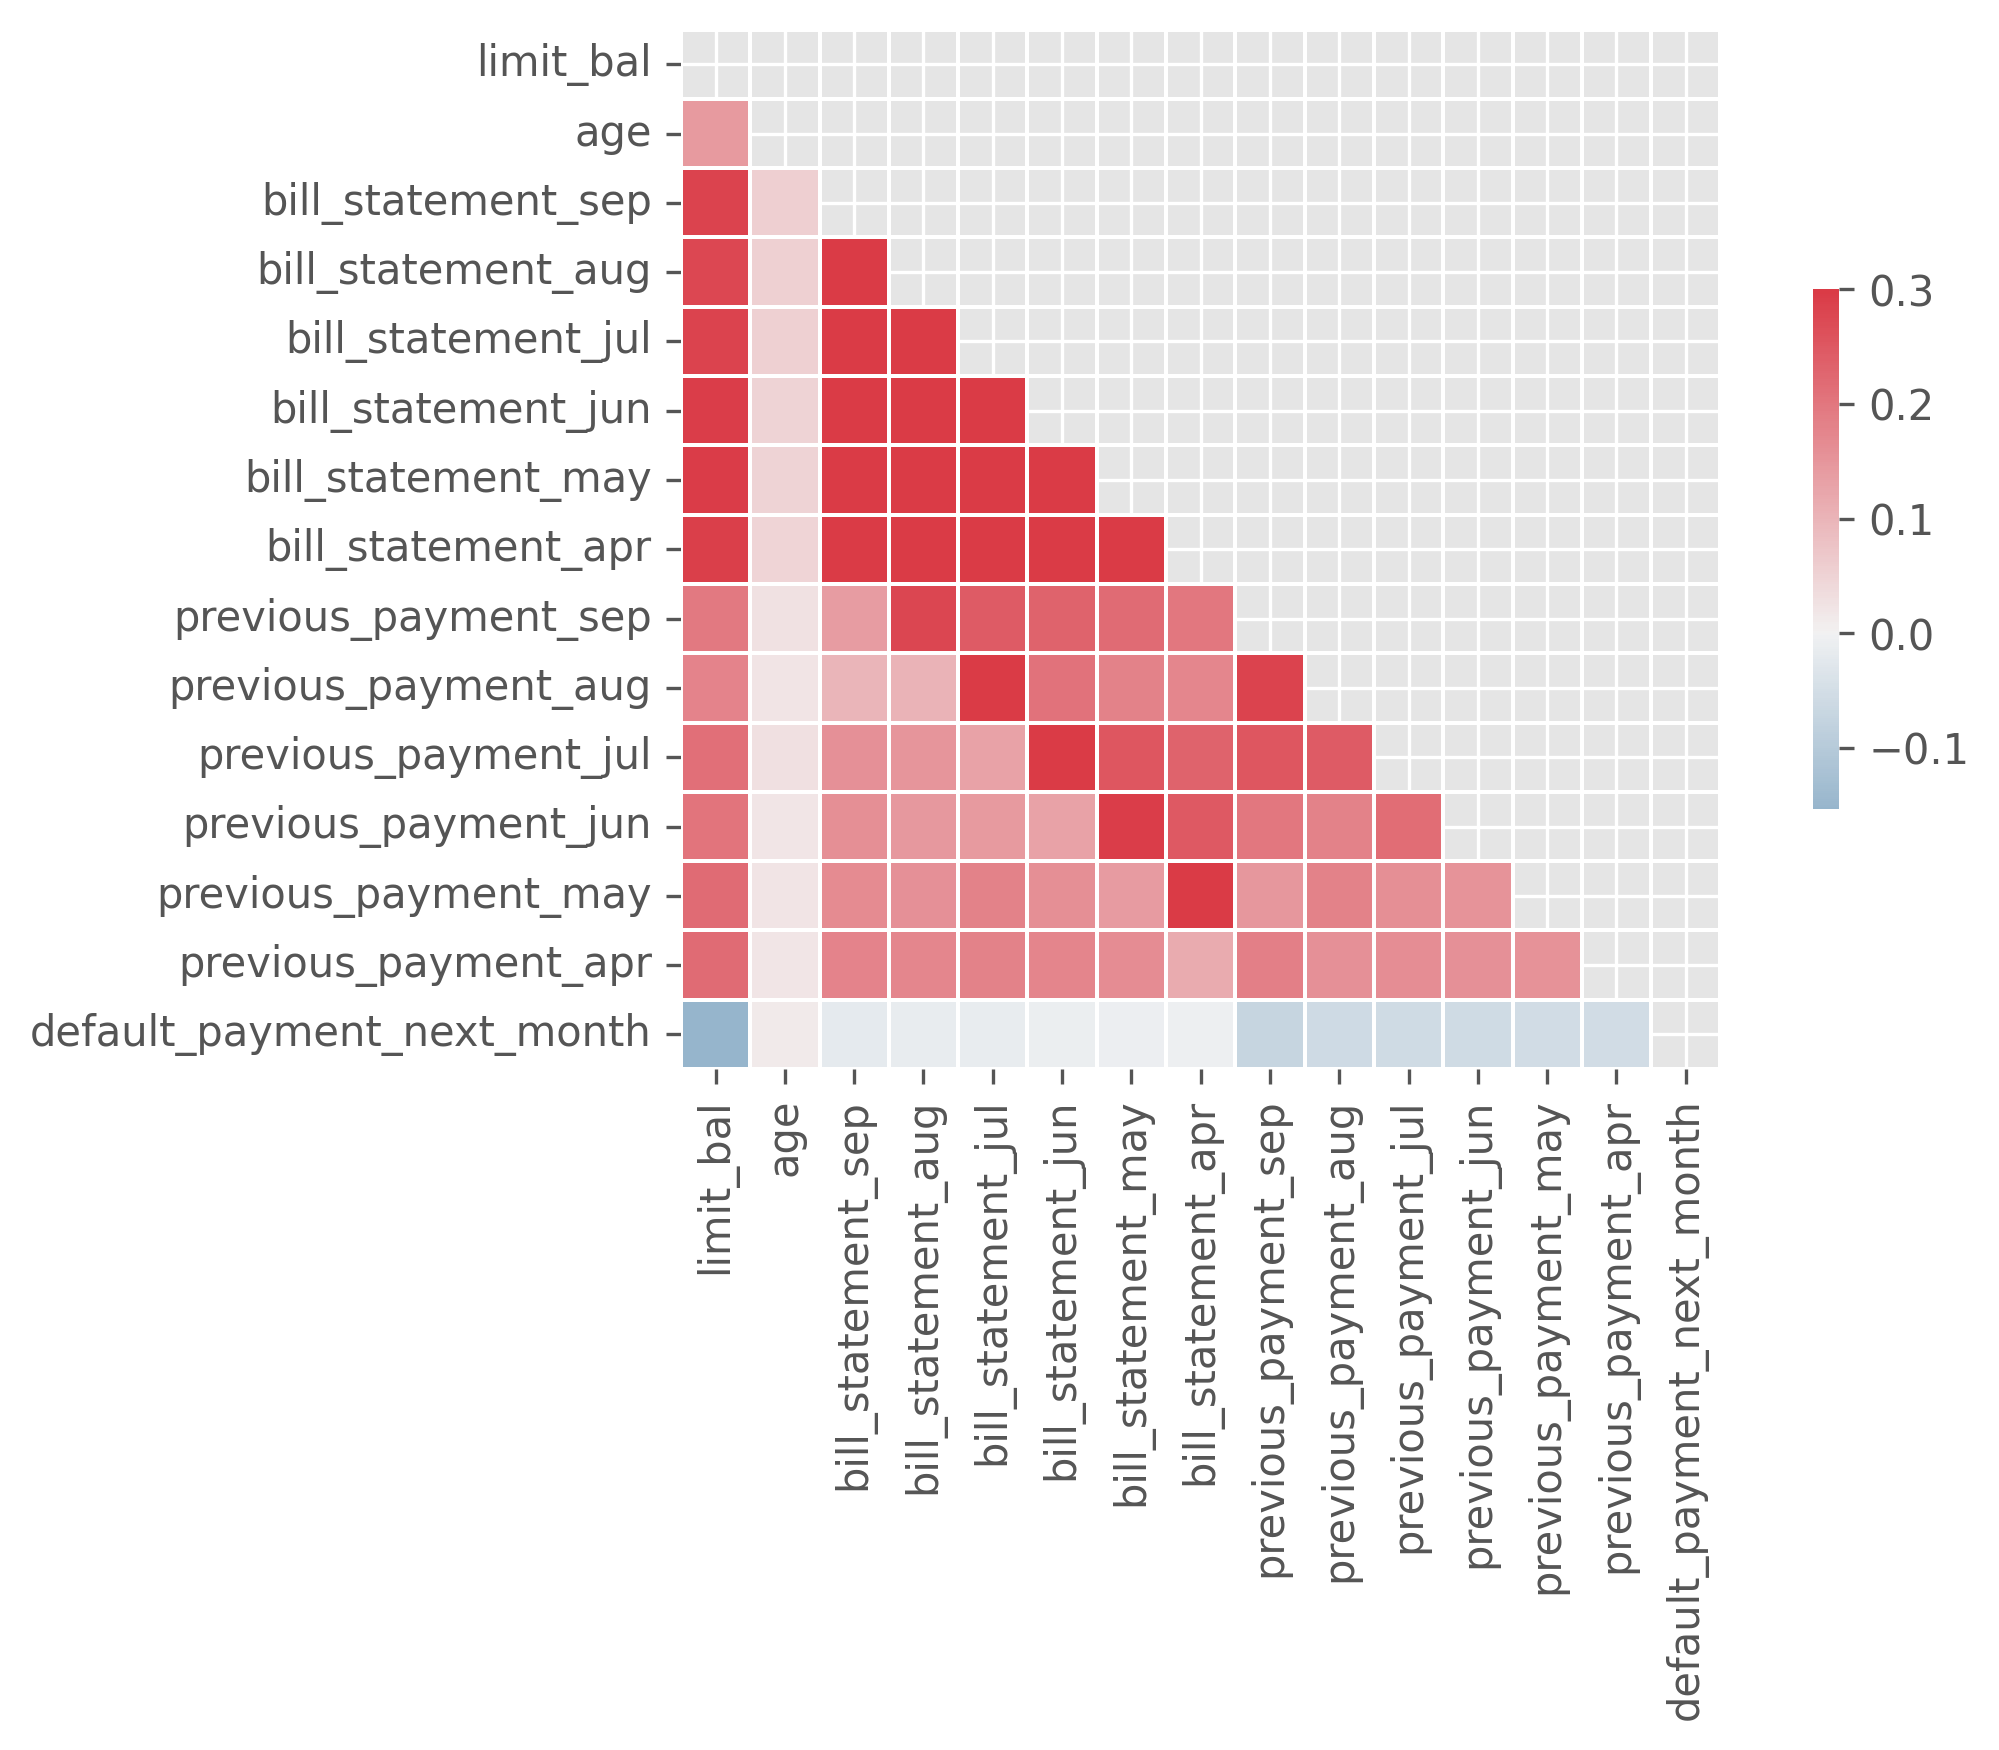

In [11]:
import numpy as np 
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})

In [12]:
df.select_dtypes(include='number').corr()[['default_payment_next_month']]

,default_payment_next_month
limit_bal,-0.153520
age,0.014491
bill_statement_sep,-0.019644
bill_statement_aug,-0.014193
bill_statement_jul,-0.014076
bill_statement_jun,-0.010156
bill_statement_may,-0.006760
bill_statement_apr,-0.005372
previous_payment_sep,-0.072929
previous_payment_aug,-0.058579


<Axes: xlabel='education', ylabel='limit_bal'>

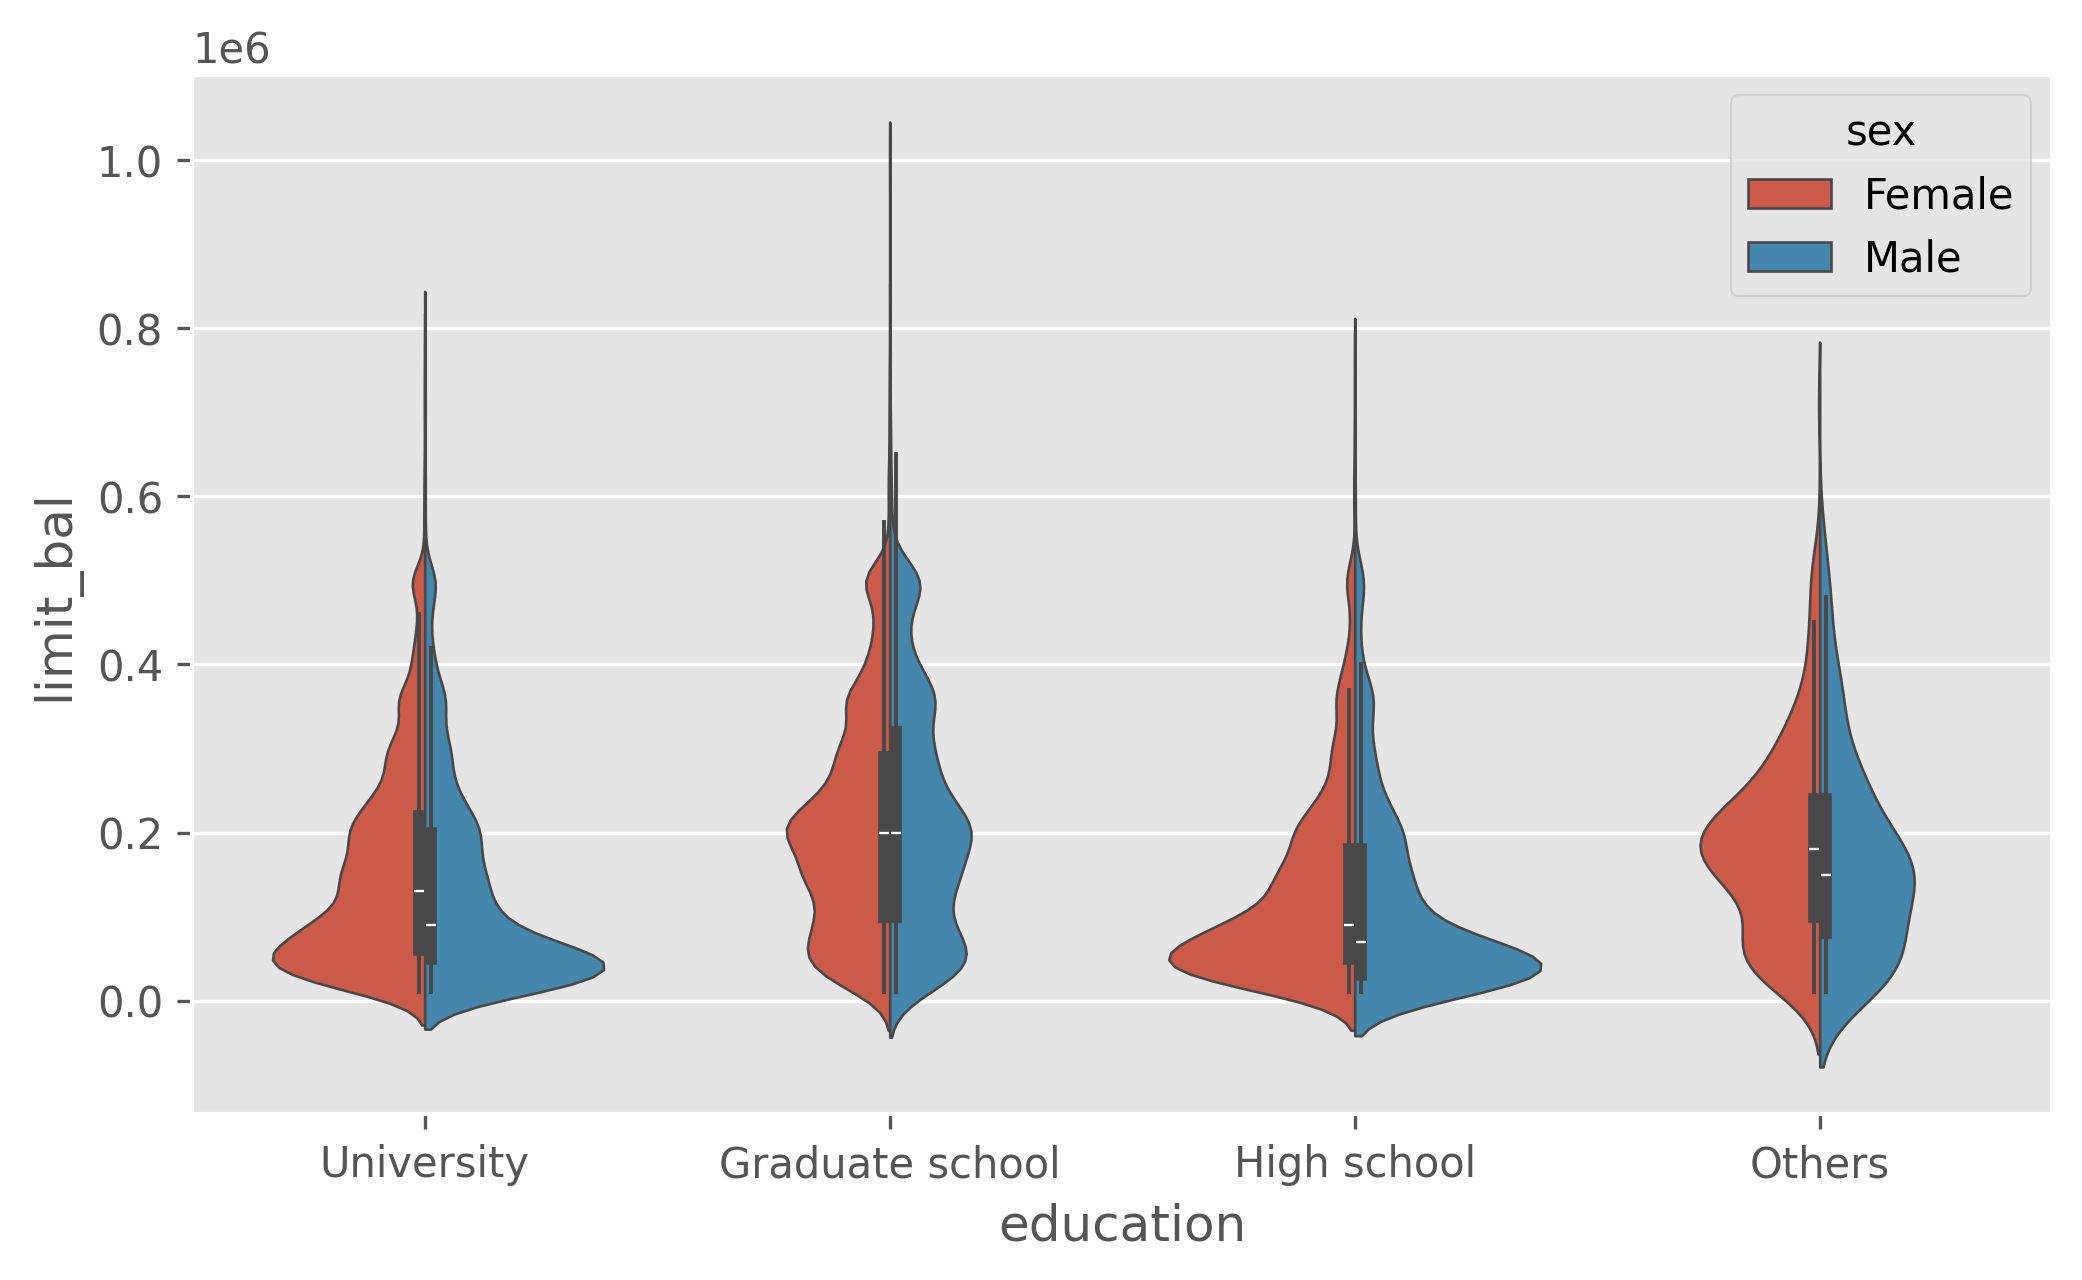

In [13]:
sns.violinplot(data=df, x = 'education', y='limit_bal', hue='sex', split=True,
               )

In [14]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
        By default, this function treats one of the variables 

<Axes: xlabel='default_payment_next_month', ylabel='count'>

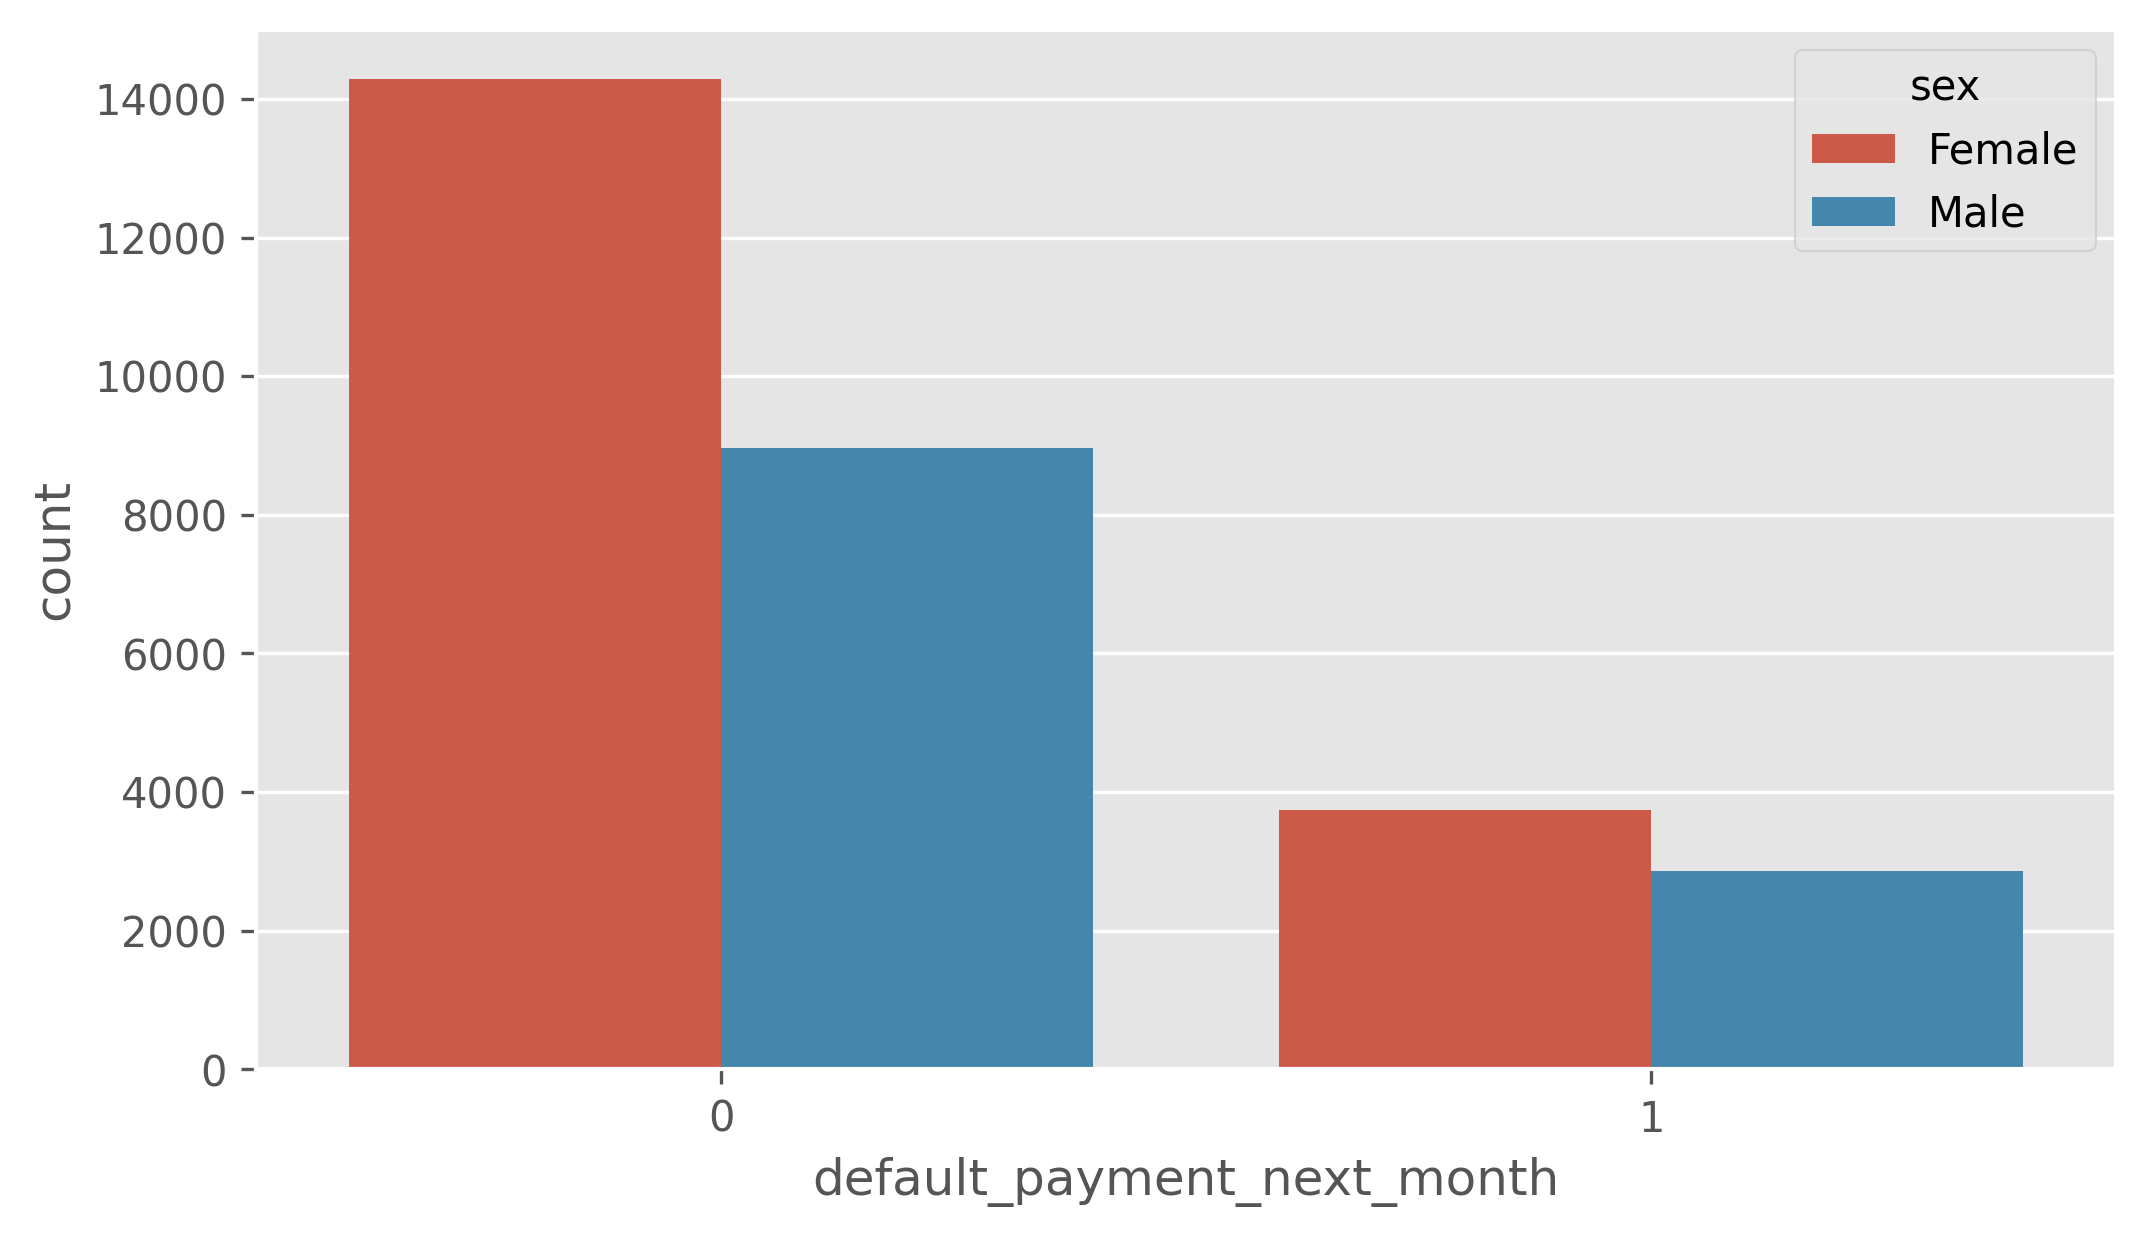

In [15]:
sns.countplot(x='default_payment_next_month', hue='sex',  data=df)

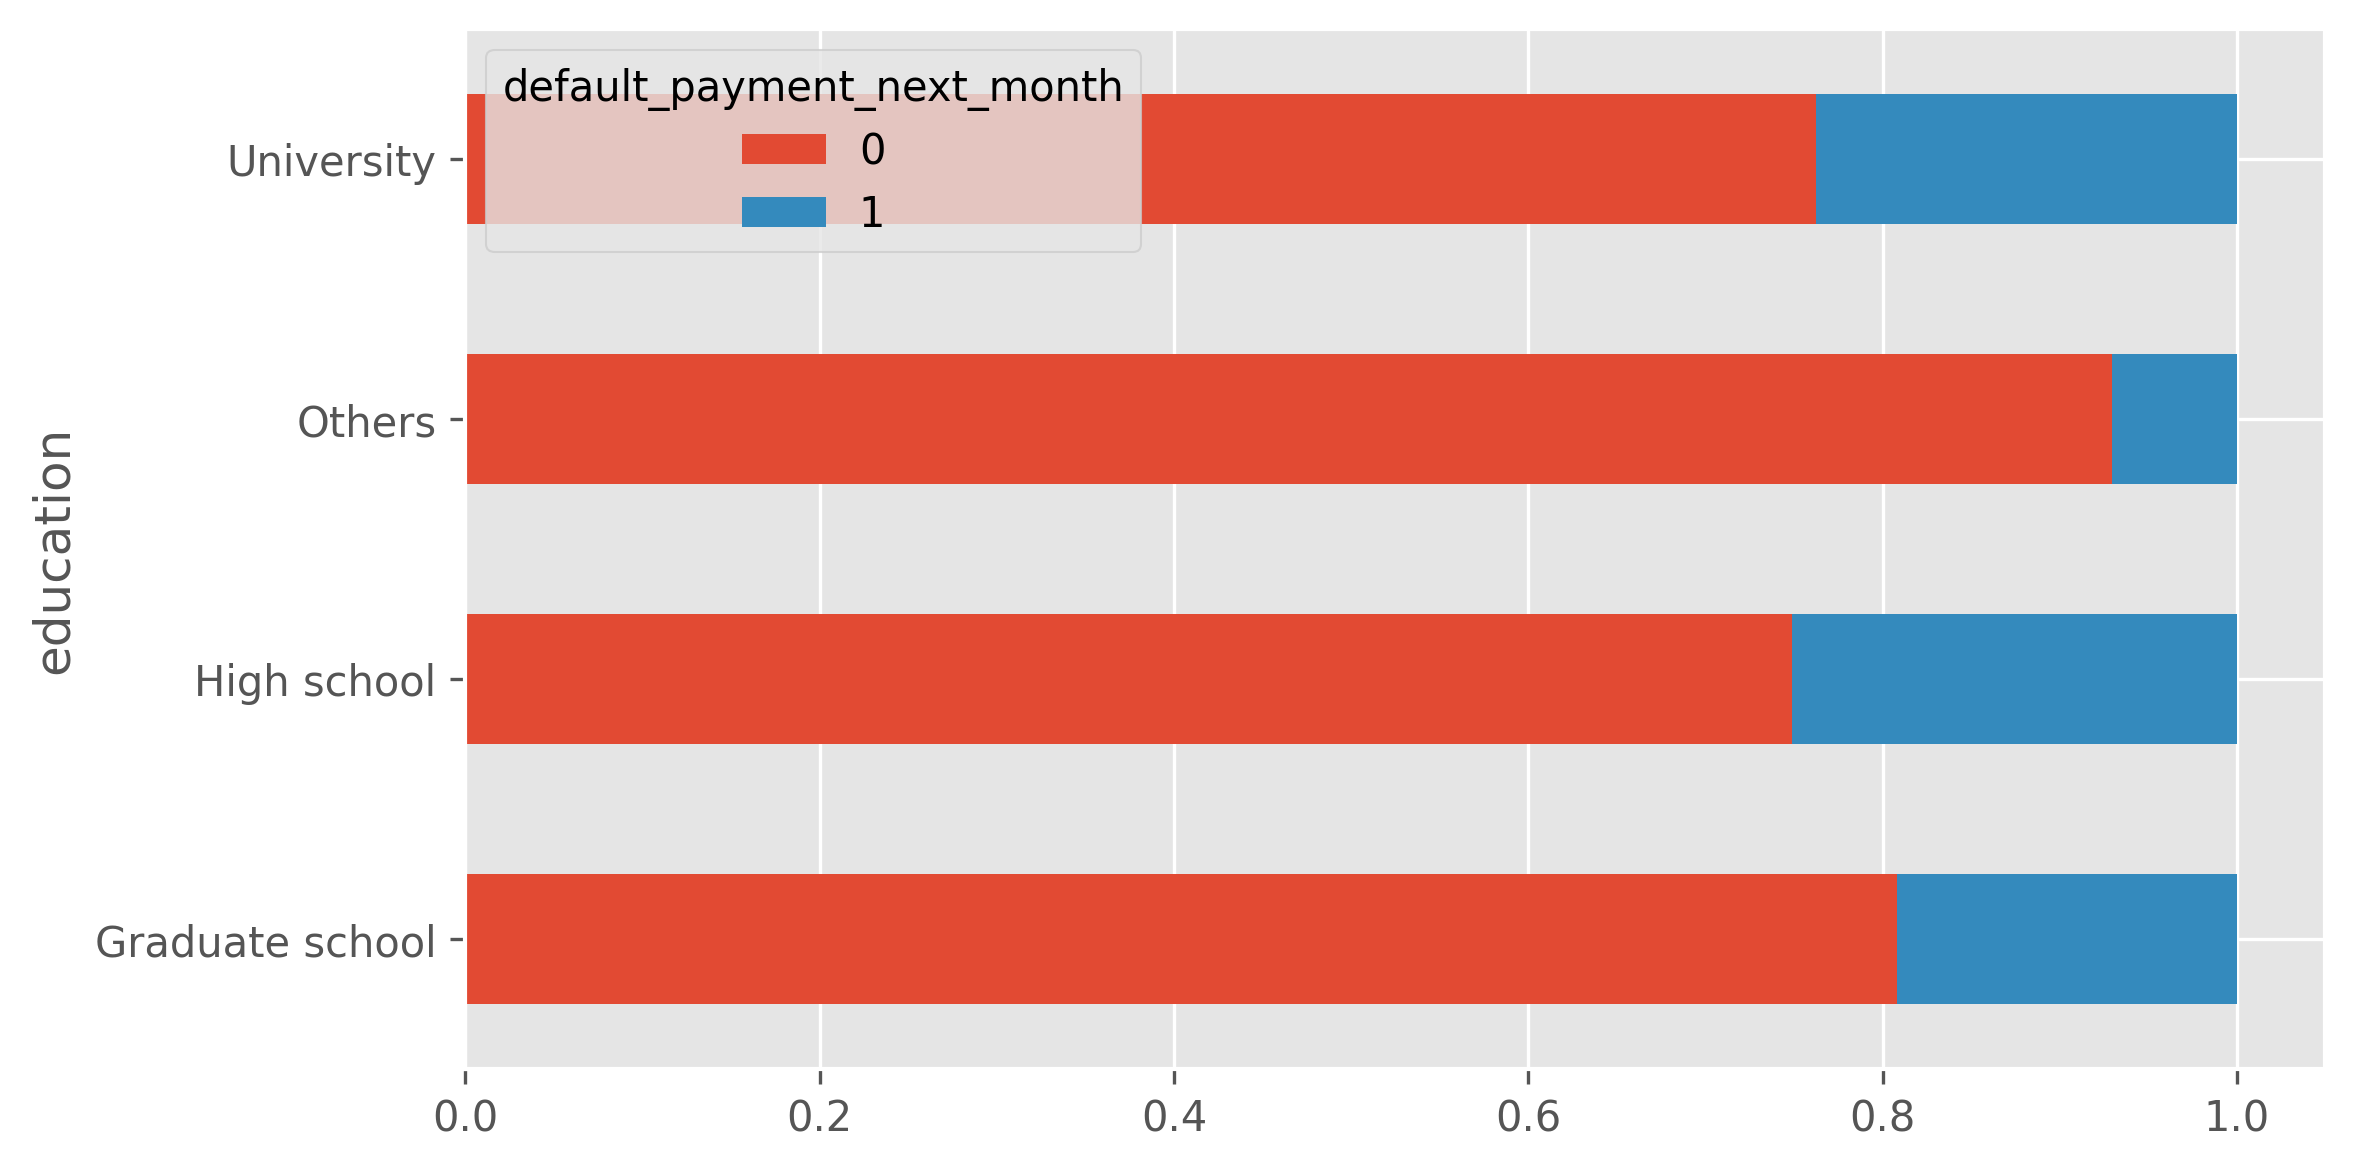

In [16]:
ax = df.groupby('education')['default_payment_next_month'].value_counts(normalize=True).unstack().plot(kind='barh', stacked='True')

In [17]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(df).to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:00<00:00, 1476.07it/s]


In [ ]:
pip install ipywidgets